# Random Forest - Classification

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline
#%matplotlib notebook
plt.rcParams["figure.figsize"] = (10,6)
import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")
pd.set_option('display.float_format', lambda x: '%.3f' % x)

## Understanding of HyperParameters with diabetes dataset

In [2]:
df = pd.read_csv("diabetes.csv")

In [3]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.600,0.627,50,1
1,1,85,66,29,0,26.600,0.351,31,0
2,8,183,64,0,0,23.300,0.672,32,1
3,1,89,66,23,94,28.100,0.167,21,0
4,0,137,40,35,168,43.100,2.288,33,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
df.Outcome.value_counts()

0    500
1    268
Name: Outcome, dtype: int64

## Train | Test Split and Scalling

In [6]:
X = df.drop("Outcome",axis=1)
y = df["Outcome"]

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=101)

In [9]:
from sklearn.preprocessing import StandardScaler

In [10]:
scaler = StandardScaler()

In [11]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Modelling and Model Performance

In [17]:
def train_val(y_train, y_train_pred, y_test, y_pred):
    
    scores = {"train_set": {"Accuracy" : accuracy_score(y_train, y_train_pred),
                            "Precision" : precision_score(y_train, y_train_pred),
                            "Recall" : recall_score(y_train, y_train_pred),                          
                            "f1" : f1_score(y_train, y_train_pred)},
    
              "test_set": {"Accuracy" : accuracy_score(y_test, y_pred),
                           "Precision" : precision_score(y_test, y_pred),
                           "Recall" : recall_score(y_test, y_pred),                          
                           "f1" : f1_score(y_test, y_pred)}}
    
    return pd.DataFrame(scores)

### Decision Tree

In [18]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, recall_score, precision_score, f1_score
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.model_selection import GridSearchCV

In [19]:
dt_model = DecisionTreeClassifier(class_weight = "balanced", random_state=101)
dt_model.fit(X_train, y_train)
y_pred = dt_model.predict(X_test)
y_train_pred = dt_model.predict(X_train)
dt_acc = accuracy_score(y_test, y_pred)
dt_recall = recall_score(y_test, y_pred)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
train_val(y_train, y_train_pred, y_test, y_pred)

[[92 32]
 [21 47]]
              precision    recall  f1-score   support

           0       0.81      0.74      0.78       124
           1       0.59      0.69      0.64        68

    accuracy                           0.72       192
   macro avg       0.70      0.72      0.71       192
weighted avg       0.74      0.72      0.73       192



,train_set,test_set
Accuracy,1.000,0.724
Precision,1.000,0.595
Recall,1.000,0.691
f1,1.000,0.639


In [20]:
model = DecisionTreeClassifier(class_weight = "balanced", random_state=101)

scores = cross_validate(model, X_train, y_train, scoring = ['accuracy', 'precision', 'recall', 'f1'], cv = 10)
df_scores = pd.DataFrame(scores, index = range(1, 11))
print(df_scores)
print("--------------------")
print(df_scores.mean()[2:])

    fit_time  score_time  test_accuracy  test_precision  test_recall  test_f1
1      0.005       0.006          0.724           0.583        0.700    0.636
2      0.006       0.006          0.603           0.440        0.550    0.489
3      0.005       0.006          0.672           0.529        0.450    0.486
4      0.005       0.009          0.655           0.500        0.600    0.545
5      0.006       0.010          0.741           0.667        0.500    0.571
6      0.005       0.009          0.759           0.688        0.550    0.611
7      0.005       0.008          0.737           0.647        0.550    0.595
8      0.004       0.009          0.544           0.364        0.400    0.381
9      0.004       0.000          0.649           0.500        0.550    0.524
10     0.000       0.000          0.719           0.611        0.550    0.579
--------------------
test_accuracy    0.680
test_precision   0.553
test_recall      0.540
test_f1          0.542
dtype: float64


In [21]:
param_grid = {"splitter":["best", "random"],
              "max_features":[None, 3, 5, 7],
              "max_depth": [None, 4, 5, 6, 7, 8, 9, 10],
              "min_samples_leaf": [1, 2, 3, 5],
              "min_samples_split": [2, 3, 5, 7, 9, 15]}

In [22]:
model = DecisionTreeClassifier(class_weight = "balanced", random_state=101)
dt_grid_model = GridSearchCV(estimator=model,
                            param_grid=param_grid,
                            scoring='recall',
                            n_jobs = -1, verbose = 2).fit(X_train, y_train)

Fitting 5 folds for each of 1536 candidates, totalling 7680 fits


In [23]:
dt_grid_model.best_params_

{'max_depth': 5,
 'max_features': 3,
 'min_samples_leaf': 2,
 'min_samples_split': 9,
 'splitter': 'random'}

In [24]:
y_pred = dt_grid_model.predict(X_test)
y_train_pred = dt_grid_model.predict(X_train)
dt_tuned_acc = accuracy_score(y_test, y_pred)
dt_tuned_recall = recall_score(y_test, y_pred)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
train_val(y_train, y_train_pred, y_test, y_pred)

[[50 74]
 [10 58]]
              precision    recall  f1-score   support

           0       0.83      0.40      0.54       124
           1       0.44      0.85      0.58        68

    accuracy                           0.56       192
   macro avg       0.64      0.63      0.56       192
weighted avg       0.69      0.56      0.56       192



,train_set,test_set
Accuracy,0.590,0.562
Precision,0.455,0.439
Recall,0.905,0.853
f1,0.605,0.580


In [25]:
dt_model = DecisionTreeClassifier(class_weight = "balanced", random_state=101,
                                  max_depth = 5,
                                  max_features = 3,
                                  min_samples_leaf = 2,
                                  min_samples_split = 9,
                                  splitter = "best").fit(X_train, y_train)
y_pred = dt_model.predict(X_test)
y_train_pred = dt_grid_model.predict(X_train)
dt_tuned_acc = accuracy_score(y_test, y_pred)
dt_tuned_recall = recall_score(y_test, y_pred)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
train_val(y_train, y_train_pred, y_test, y_pred)

[[82 42]
 [11 57]]
              precision    recall  f1-score   support

           0       0.88      0.66      0.76       124
           1       0.58      0.84      0.68        68

    accuracy                           0.72       192
   macro avg       0.73      0.75      0.72       192
weighted avg       0.77      0.72      0.73       192



,train_set,test_set
Accuracy,0.590,0.724
Precision,0.455,0.576
Recall,0.905,0.838
f1,0.605,0.683


### Random Forest

In [26]:
rf_model = RandomForestClassifier(class_weight = "balanced", random_state=101)
rf_model.fit(X_train, y_train)
y_pred = rf_model.predict(X_test)
y_pred_train = rf_model.predict(X_train)
rf_acc = accuracy_score(y_test, y_pred)
rf_recall = recall_score(y_test, y_pred)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
train_val(y_train, y_train_pred, y_test, y_pred)

<IPython.core.display.Javascript object>

[[105  19]
 [ 25  43]]
              precision    recall  f1-score   support

           0       0.81      0.85      0.83       124
           1       0.69      0.63      0.66        68

    accuracy                           0.77       192
   macro avg       0.75      0.74      0.74       192
weighted avg       0.77      0.77      0.77       192



,train_set,test_set
Accuracy,0.590,0.771
Precision,0.455,0.694
Recall,0.905,0.632
f1,0.605,0.662


In [27]:
model = RandomForestClassifier(class_weight = "balanced", random_state=101)

scores = cross_validate(model, X_train, y_train, scoring = ["accuracy", "precision", "recall", "f1"], cv = 10)
df_scores = pd.DataFrame(scores, index = range(1, 11))
print(df_scores)
print("--------------------")
print(df_scores.mean()[2:])

<IPython.core.display.Javascript object>

    fit_time  score_time  test_accuracy  test_precision  test_recall  test_f1
1      0.178       0.016          0.724           0.625        0.500    0.556
2      0.187       0.016          0.724           0.577        0.750    0.652
3      0.172       0.016          0.741           0.727        0.400    0.516
4      0.187       0.016          0.724           0.591        0.650    0.619
5      0.172       0.030          0.759           0.667        0.600    0.632
6      0.171       0.016          0.845           0.923        0.600    0.727
7      0.185       0.016          0.807           0.909        0.500    0.645
8      0.172       0.016          0.702           0.571        0.600    0.585
9      0.187       0.016          0.737           0.647        0.550    0.595
10     0.174       0.016          0.772           0.769        0.500    0.606
--------------------
test_accuracy    0.753
test_precision   0.701
test_recall      0.565
test_f1          0.613
dtype: float64


In [28]:
param_grid = {'n_estimators':[50, 100, 300],
             'max_features':[2, 3, 4],
             'max_depth':[3, 5, 7, 9],
             'min_samples_split':[2, 5, 8]}

In [29]:
model = RandomForestClassifier(class_weight = "balanced", random_state=101)
rf_grid_model = GridSearchCV(model, param_grid, scoring = "recall", n_jobs = -1, verbose = 2).fit(X_train, y_train)

<IPython.core.display.Javascript object>

Fitting 5 folds for each of 108 candidates, totalling 540 fits


In [30]:
rf_grid_model.best_params_

{'max_depth': 3, 'max_features': 2, 'min_samples_split': 2, 'n_estimators': 50}

In [31]:
y_pred = rf_grid_model.predict(X_test)
y_train_pred = rf_grid_model.predict(X_train)
rf_tuned_acc = accuracy_score(y_test, y_pred)
rf_tuned_recall = recall_score(y_test, y_pred)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
train_val(y_train, y_train_pred, y_test, y_pred)

[[86 38]
 [16 52]]
              precision    recall  f1-score   support

           0       0.84      0.69      0.76       124
           1       0.58      0.76      0.66        68

    accuracy                           0.72       192
   macro avg       0.71      0.73      0.71       192
weighted avg       0.75      0.72      0.72       192



,train_set,test_set
Accuracy,0.797,0.719
Precision,0.668,0.578
Recall,0.825,0.765
f1,0.738,0.658


In [32]:
rf_model = RandomForestClassifier(class_weight = "balanced", random_state=101,
                                  max_depth = 3,
                                  max_features = 2,
                                  min_samples_split = 2,
                                  n_estimators = 50).fit(X_train, y_train)
y_pred = rf_model.predict(X_test)
y_pred_train = rf_model.predict(X_train)
rf_acc = accuracy_score(y_test, y_pred)
rf_recall = recall_score(y_test, y_pred)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
train_val(y_train, y_train_pred, y_test, y_pred)

<IPython.core.display.Javascript object>

[[86 38]
 [16 52]]
              precision    recall  f1-score   support

           0       0.84      0.69      0.76       124
           1       0.58      0.76      0.66        68

    accuracy                           0.72       192
   macro avg       0.71      0.73      0.71       192
weighted avg       0.75      0.72      0.72       192



,train_set,test_set
Accuracy,0.797,0.719
Precision,0.668,0.578
Recall,0.825,0.765
f1,0.738,0.658


In [33]:
from sklearn.tree import plot_tree

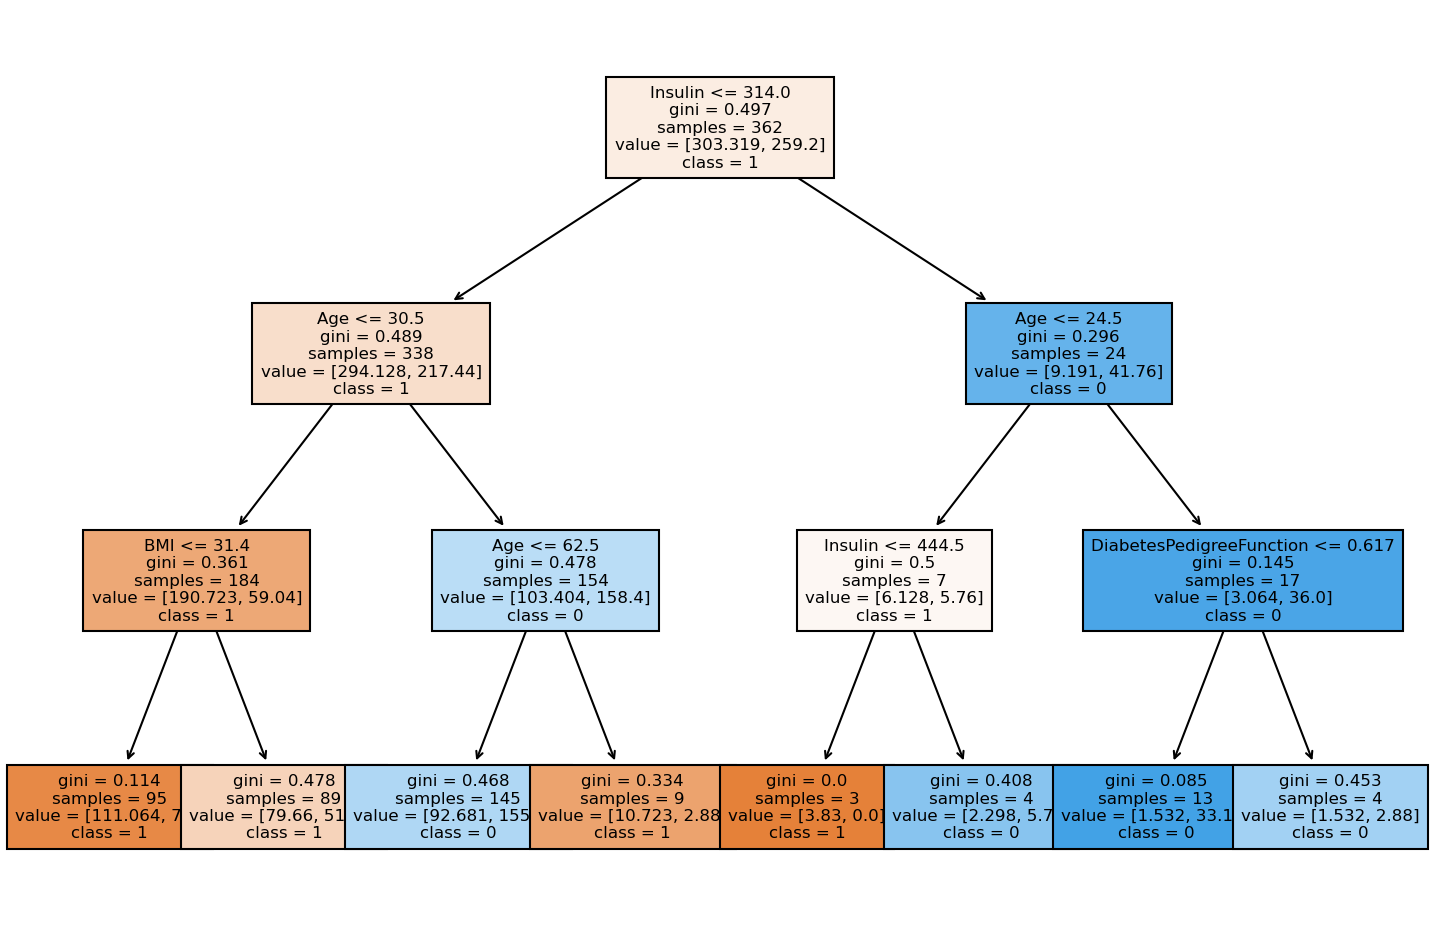

In [34]:
features = list(X.columns)
targets = df.Outcome.astype("str")
targets = targets.unique()
plt.figure(figsize = (12,8), dpi = 150)
plot_tree(rf_model.estimators_[0],
          feature_names = features,
          class_names=targets,
          filled = True,
          fontsize = 8);

### Logistic Regression

In [35]:
from sklearn.linear_model import LogisticRegression

In [36]:
log_model=LogisticRegression(class_weight = "balanced")
log_model.fit(X_train_scaled, y_train)
y_pred=log_model.predict(X_test_scaled)
y_pred_train = log_model.predict(X_train_scaled)
log_acc = accuracy_score(y_test, y_pred)
log_recall = recall_score(y_test, y_pred)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
train_val(y_train, y_train_pred, y_test, y_pred)

[[93 31]
 [16 52]]
              precision    recall  f1-score   support

           0       0.85      0.75      0.80       124
           1       0.63      0.76      0.69        68

    accuracy                           0.76       192
   macro avg       0.74      0.76      0.74       192
weighted avg       0.77      0.76      0.76       192



,train_set,test_set
Accuracy,0.797,0.755
Precision,0.668,0.627
Recall,0.825,0.765
f1,0.738,0.689


In [37]:
model = LogisticRegression(class_weight = "balanced")

scores = cross_validate(model, X_train, y_train, scoring = ["accuracy", "precision", "recall", "f1"], cv = 10)
df_scores = pd.DataFrame(scores, index = range(1, 11))
print(df_scores)
print("--------------------")
print(df_scores.mean()[2:])

    fit_time  score_time  test_accuracy  test_precision  test_recall  test_f1
1      0.036       0.005          0.690           0.538        0.700    0.609
2      0.035       0.007          0.672           0.516        0.800    0.627
3      0.033       0.005          0.759           0.714        0.500    0.588
4      0.028       0.000          0.741           0.600        0.750    0.667
5      0.031       0.014          0.741           0.600        0.750    0.667
6      0.035       0.006          0.793           0.682        0.750    0.714
7      0.025       0.000          0.860           0.750        0.900    0.818
8      0.031       0.016          0.667           0.517        0.750    0.612
9      0.031       0.000          0.772           0.667        0.700    0.683
10     0.031       0.000          0.807           0.765        0.650    0.703
--------------------
test_accuracy    0.750
test_precision   0.635
test_recall      0.725
test_f1          0.669
dtype: float64


### KNN

In [38]:
from sklearn.neighbors import KNeighborsClassifier

In [39]:
test_error_rates = []


for k in range(1,30):
    knn_model = KNeighborsClassifier(n_neighbors=k)
    knn_model.fit(X_train_scaled,y_train) 
   
    y_pred_test = knn_model.predict(X_test_scaled)
    
    test_error = 1 - recall_score(y_test,y_pred_test)
    test_error_rates.append(test_error)

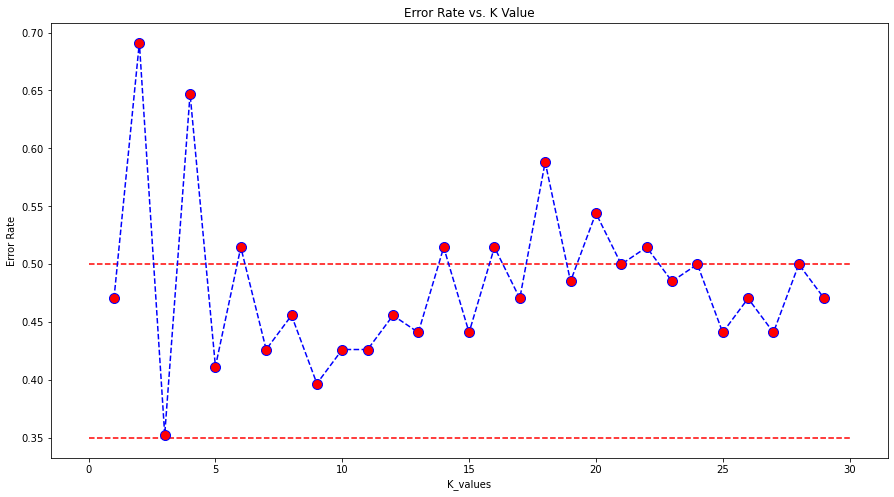

In [40]:
plt.figure(figsize=(15,8))
plt.plot(range(1,30), test_error_rates, color='blue', linestyle='--', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K_values')
plt.ylabel('Error Rate')
plt.hlines(y=0.35, xmin = 0, xmax = 30, colors= 'r', linestyles="--")
plt.hlines(y=0.5, xmin = 0, xmax = 30, colors= 'r', linestyles="--")

In [41]:
knn_model = KNeighborsClassifier(n_neighbors = 3)
knn_model.fit(X_train_scaled, y_train)
y_pred = knn_model.predict(X_test_scaled)
y_pred_train = knn_model.predict(X_train_scaled)
knn_acc = accuracy_score(y_test, y_pred)
knn_recall = recall_score(y_test, y_pred)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
train_val(y_train, y_train_pred, y_test, y_pred)

[[104  20]
 [ 24  44]]
              precision    recall  f1-score   support

           0       0.81      0.84      0.83       124
           1       0.69      0.65      0.67        68

    accuracy                           0.77       192
   macro avg       0.75      0.74      0.75       192
weighted avg       0.77      0.77      0.77       192



,train_set,test_set
Accuracy,0.797,0.771
Precision,0.668,0.688
Recall,0.825,0.647
f1,0.738,0.667


In [42]:
model = KNeighborsClassifier(n_neighbors = 3)

scores = cross_validate(model, X_train_scaled, y_train, scoring = ["accuracy", "precision", "recall", "f1"], cv = 10)
df_scores = pd.DataFrame(scores, index = range(1, 11))
print(df_scores)
print("--------------------")
print(df_scores.mean()[2:])

    fit_time  score_time  test_accuracy  test_precision  test_recall  test_f1
1      0.002       0.008          0.741           0.632        0.600    0.615
2      0.002       0.008          0.621           0.458        0.550    0.500
3      0.002       0.008          0.793           0.786        0.550    0.647
4      0.002       0.008          0.707           0.600        0.450    0.514
5      0.001       0.008          0.741           0.647        0.550    0.595
6      0.002       0.008          0.707           0.579        0.550    0.564
7      0.002       0.008          0.719           0.625        0.500    0.556
8      0.002       0.008          0.684           0.550        0.550    0.550
9      0.002       0.007          0.632           0.471        0.400    0.432
10     0.001       0.009          0.737           0.632        0.600    0.615
--------------------
test_accuracy    0.708
test_precision   0.598
test_recall      0.530
test_f1          0.559
dtype: float64


### SVM

In [43]:
from sklearn.svm import SVC

In [44]:
svm_model = SVC(class_weight = "balanced")
svm_model.fit(X_train_scaled, y_train)
y_pred = svm_model.predict(X_test_scaled)
y_pred_train = svm_model.predict(X_train_scaled)
svm_acc = accuracy_score(y_test, y_pred)
svm_recall = recall_score(y_test, y_pred)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
train_val(y_train, y_train_pred, y_test, y_pred)

[[90 34]
 [14 54]]
              precision    recall  f1-score   support

           0       0.87      0.73      0.79       124
           1       0.61      0.79      0.69        68

    accuracy                           0.75       192
   macro avg       0.74      0.76      0.74       192
weighted avg       0.78      0.75      0.76       192



,train_set,test_set
Accuracy,0.797,0.750
Precision,0.668,0.614
Recall,0.825,0.794
f1,0.738,0.692


In [45]:
model = SVC(class_weight = "balanced")

scores = cross_validate(model, X_train_scaled, y_train, scoring = ['accuracy', 'precision','recall','f1'], cv = 10)
df_scores = pd.DataFrame(scores, index = range(1, 11))
print(df_scores)
print("--------------------")
print(df_scores.mean()[2:])

    fit_time  score_time  test_accuracy  test_precision  test_recall  test_f1
1      0.013       0.007          0.690           0.536        0.750    0.625
2      0.012       0.007          0.655           0.500        0.800    0.615
3      0.011       0.007          0.741           0.667        0.500    0.571
4      0.012       0.007          0.741           0.593        0.800    0.681
5      0.010       0.000          0.793           0.667        0.800    0.727
6      0.016       0.000          0.793           0.654        0.850    0.739
7      0.016       0.000          0.842           0.739        0.850    0.791
8      0.016       0.012          0.702           0.548        0.850    0.667
9      0.011       0.005          0.754           0.636        0.700    0.667
10     0.000       0.016          0.772           0.652        0.750    0.698
--------------------
test_accuracy    0.748
test_precision   0.619
test_recall      0.765
test_f1          0.678
dtype: float64


In [46]:
param_grid = {'C': [0.1, 1, 10, 100],
              'gamma': ["scale", "auto", 1, 0.1, 0.01],
              'kernel': ['rbf', 'linear', 'poly'],
              'degree':[2,3,4]}

In [47]:
model = SVC(class_weight = "balanced")
svm_grid_model = GridSearchCV(model, param_grid, scoring = "f1", n_jobs = -1, verbose = 2).fit(X_train_scaled, y_train)

Fitting 5 folds for each of 180 candidates, totalling 900 fits


In [48]:
svm_grid_model.best_params_

{'C': 1, 'degree': 2, 'gamma': 0.1, 'kernel': 'rbf'}

In [49]:
y_pred = svm_grid_model.predict(X_test_scaled)
y_pred_train = svm_grid_model.predict(X_train_scaled)
svm_tuned_acc = accuracy_score(y_test, y_pred)
svm_tuned_recall = recall_score(y_test, y_pred)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
train_val(y_train, y_train_pred, y_test, y_pred)

[[88 36]
 [14 54]]
              precision    recall  f1-score   support

           0       0.86      0.71      0.78       124
           1       0.60      0.79      0.68        68

    accuracy                           0.74       192
   macro avg       0.73      0.75      0.73       192
weighted avg       0.77      0.74      0.75       192



,train_set,test_set
Accuracy,0.797,0.740
Precision,0.668,0.600
Recall,0.825,0.794
f1,0.738,0.684


In [50]:
svm_model = SVC(class_weight = "balanced",
                C = 1,
                gamma = 0.1,
                kernel = "rbf",
                degree = 2).fit(X_train_scaled, y_train)
y_pred = svm_model.predict(X_test_scaled)
y_pred_train = svm_model.predict(X_train_scaled)
svm_tuned_acc = accuracy_score(y_test, y_pred)
svm_tuned_recall = recall_score(y_test, y_pred)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
train_val(y_train, y_train_pred, y_test, y_pred)

[[88 36]
 [14 54]]
              precision    recall  f1-score   support

           0       0.86      0.71      0.78       124
           1       0.60      0.79      0.68        68

    accuracy                           0.74       192
   macro avg       0.73      0.75      0.73       192
weighted avg       0.77      0.74      0.75       192



,train_set,test_set
Accuracy,0.797,0.740
Precision,0.668,0.600
Recall,0.825,0.794
f1,0.738,0.684


## Model Comparing

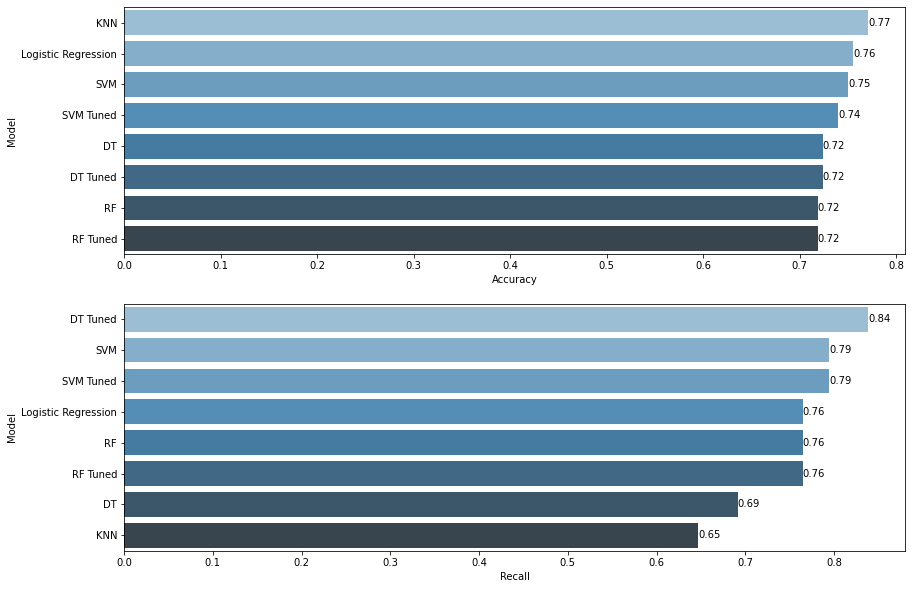

In [51]:
compare = pd.DataFrame({"Model": ["Logistic Regression", "KNN", "SVM", "SVM Tuned", "DT", "DT Tuned", "RF", "RF Tuned"],
                        "Accuracy": [log_acc, knn_acc, svm_acc, svm_tuned_acc, dt_acc, dt_tuned_acc, rf_acc, rf_tuned_acc],
                        "Recall": [log_recall, knn_recall, svm_recall,  svm_tuned_recall, dt_recall, dt_tuned_recall, rf_recall, rf_tuned_recall]})

def labels(ax):
    for p in ax.patches:
        width = p.get_width()                        # get bar length
        ax.text(width,                               # set the text at 1 unit right of the bar
                p.get_y() + p.get_height() / 2,      # get Y coordinate + X coordinate / 2
                '{:1.2f}'.format(width),             # set variable to display, 2 decimals
                ha = 'left',                         # horizontal alignment
                va = 'center')                       # vertical alignment
    
plt.figure(figsize=(14,10))
plt.subplot(211)
compare = compare.sort_values(by="Accuracy", ascending=False)
ax=sns.barplot(x="Accuracy", y="Model", data=compare, palette="Blues_d")
labels(ax)

plt.subplot(212)
compare = compare.sort_values(by="Recall", ascending=False)
ax=sns.barplot(x="Recall", y="Model", data=compare, palette="Blues_d")
labels(ax)
plt.show()